# Manual implementation

In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cancer_tumor_data_features.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

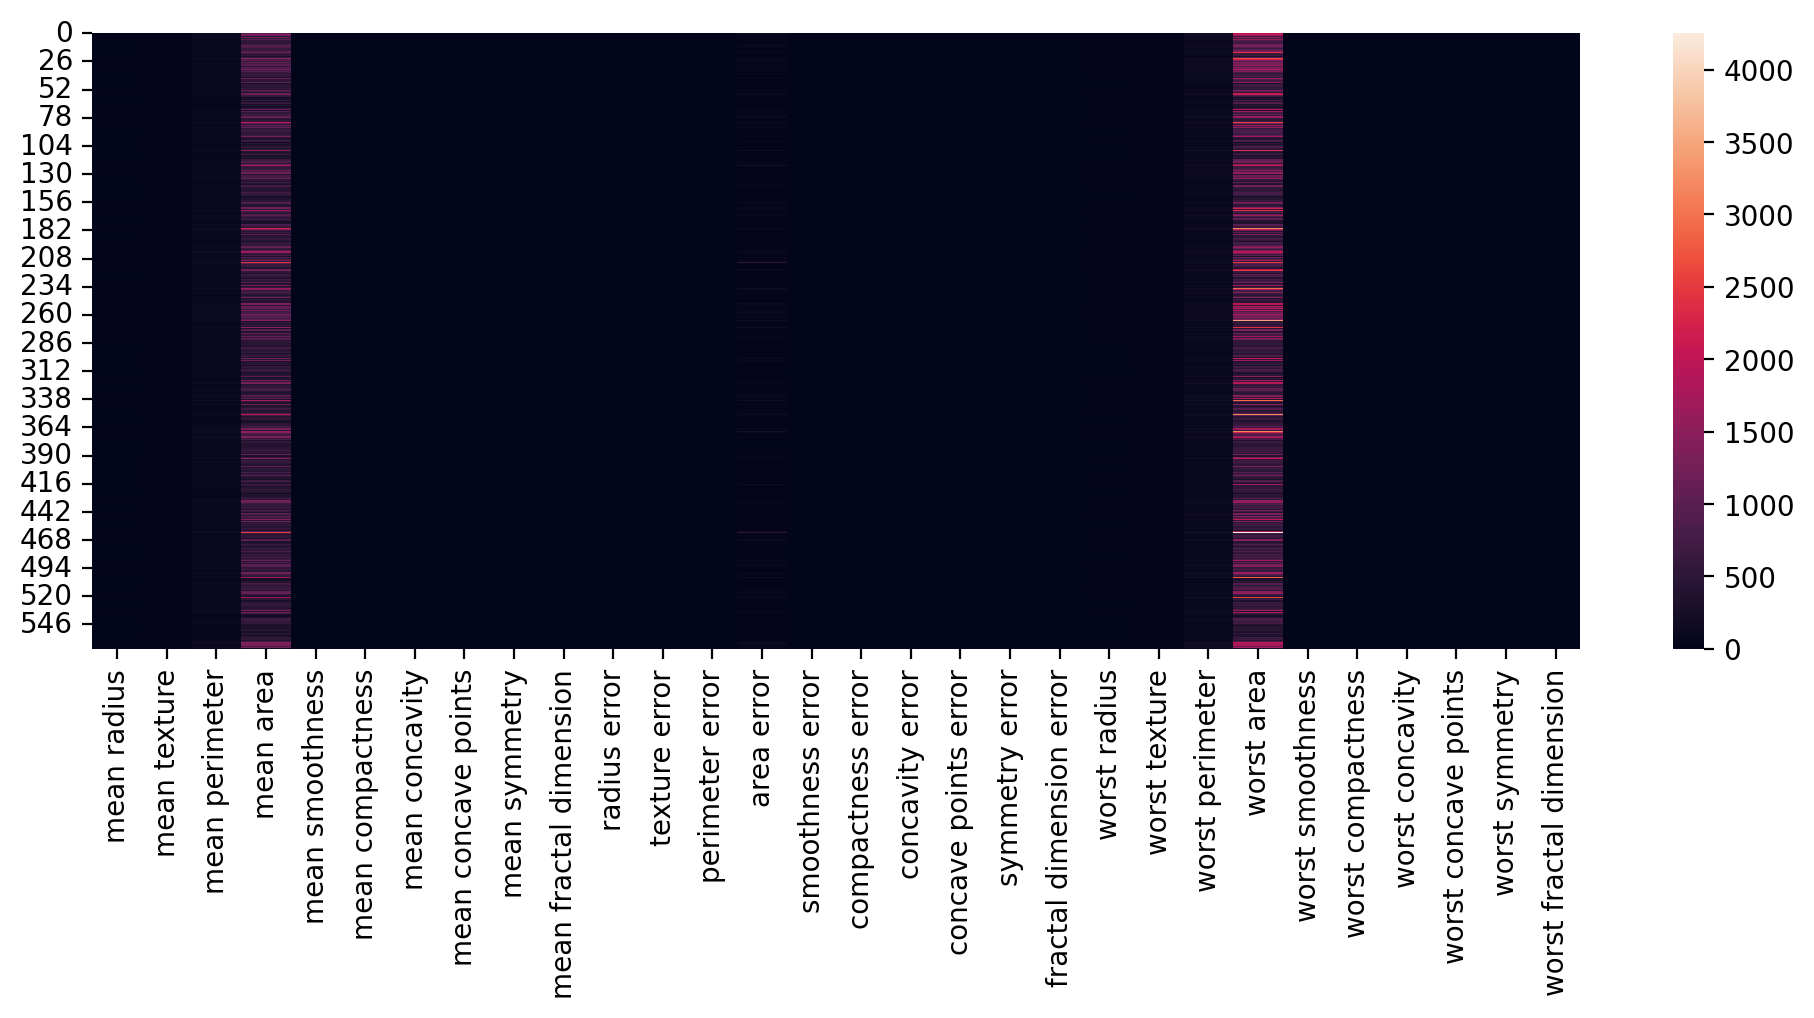

In [3]:
plt.figure(figsize=(12,4) , dpi=200)
sns.heatmap(data=df)

In [4]:
# lets reduce dimesions 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaled_X = scaler.fit_transform(df)

In [6]:
# covariance matrix 
cov_mat = np.cov(scaled_X, rowvar= False)

In [7]:
# eigen values/vectors
eigen_val , eigen_vec  = np.linalg.eig(cov_mat)

In [8]:
# choose components
# N features space --> N  pc space --> 2 

num_componetes = 2 
sorted_key= np.argsort(eigen_val)[::-1][:num_componetes]


In [9]:
# sorting values
eigen_val , eigen_vec = eigen_val[sorted_key] , eigen_vec[: , sorted_key]

In [10]:
principal = np.dot(scaled_X,eigen_vec)

In [11]:
principal

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

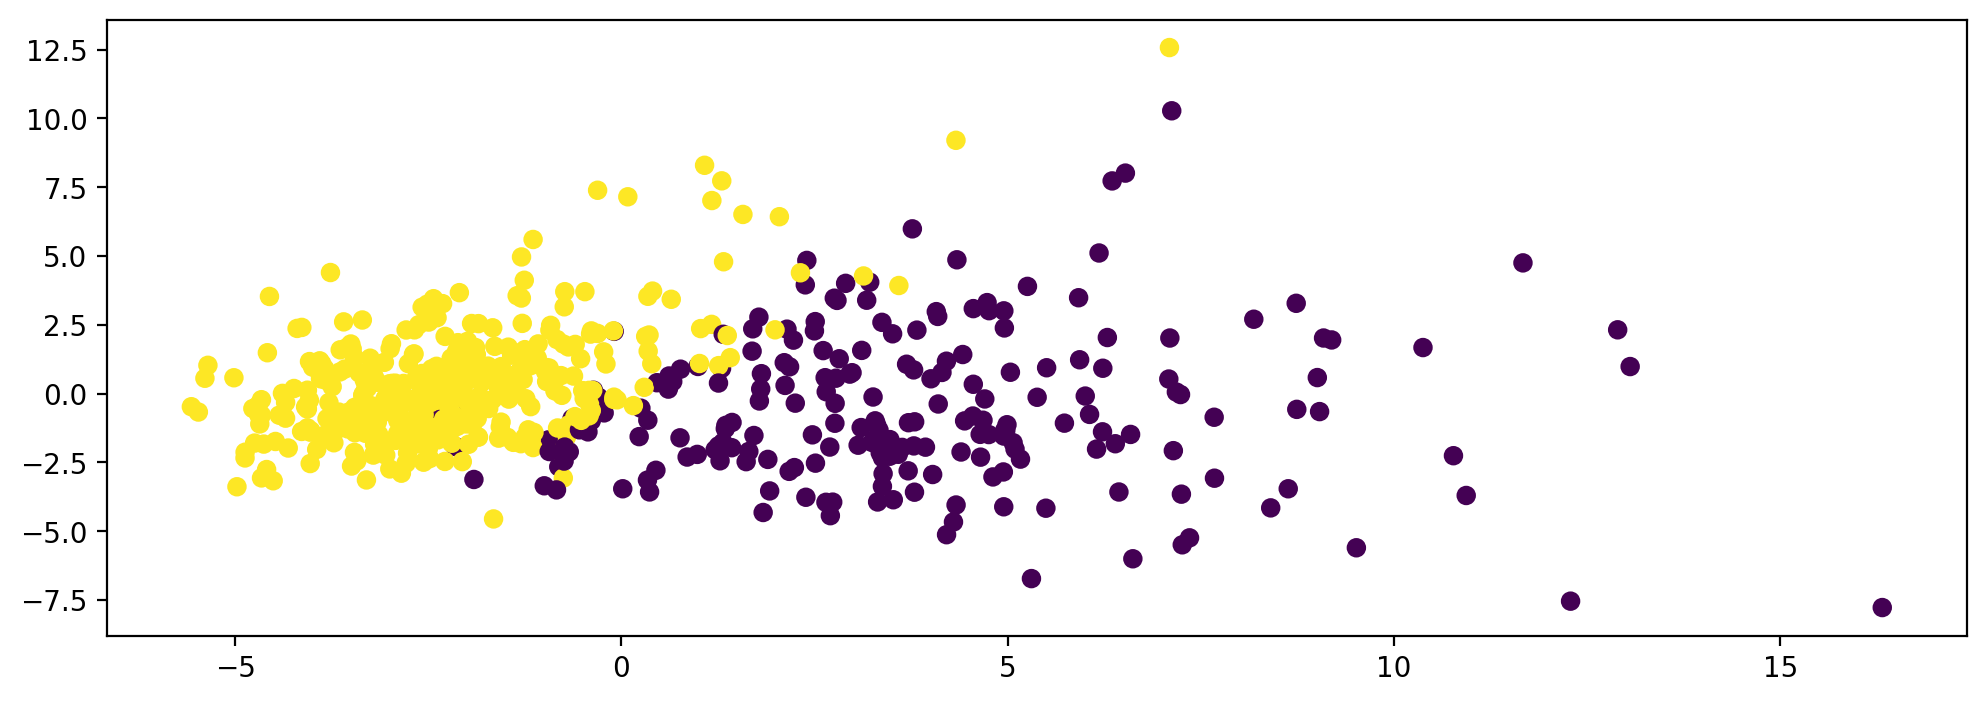

In [16]:
plt.figure(figsize=(12,4) , dpi=200)
plt.scatter(principal[:,0] , principal[:,1] , c=cancer_dict["target"])

In [14]:
from sklearn.datasets import load_breast_cancer

In [15]:
cancer_dict = load_breast_cancer()

# SCIKI_LEARN IMPLEMENTATION

In [24]:
# lets reduce dimesions 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [25]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)

In [26]:
pca = pca_model.fit_transform(scaled_X)

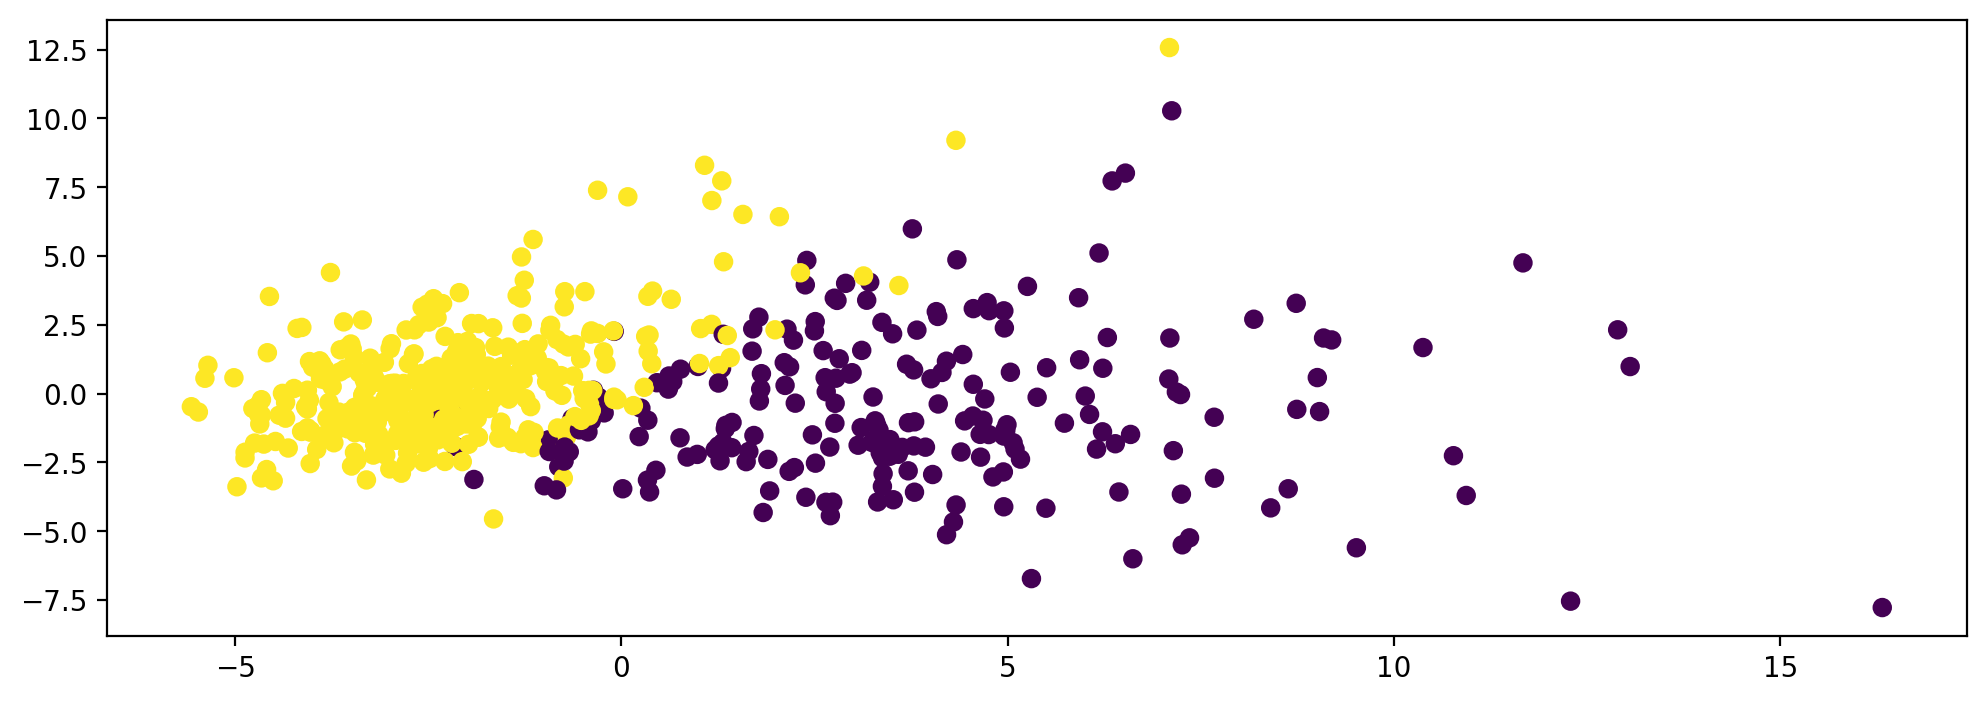

In [27]:
plt.figure(figsize=(12,4) , dpi=200)
plt.scatter(pca[:,0] , pca[:,1] , c=cancer_dict["target"])

In [28]:
df_comp =   pd.DataFrame(pca_model.components_ , index=["PC1" , "PC2"] , columns=df.columns)

<Axes: >

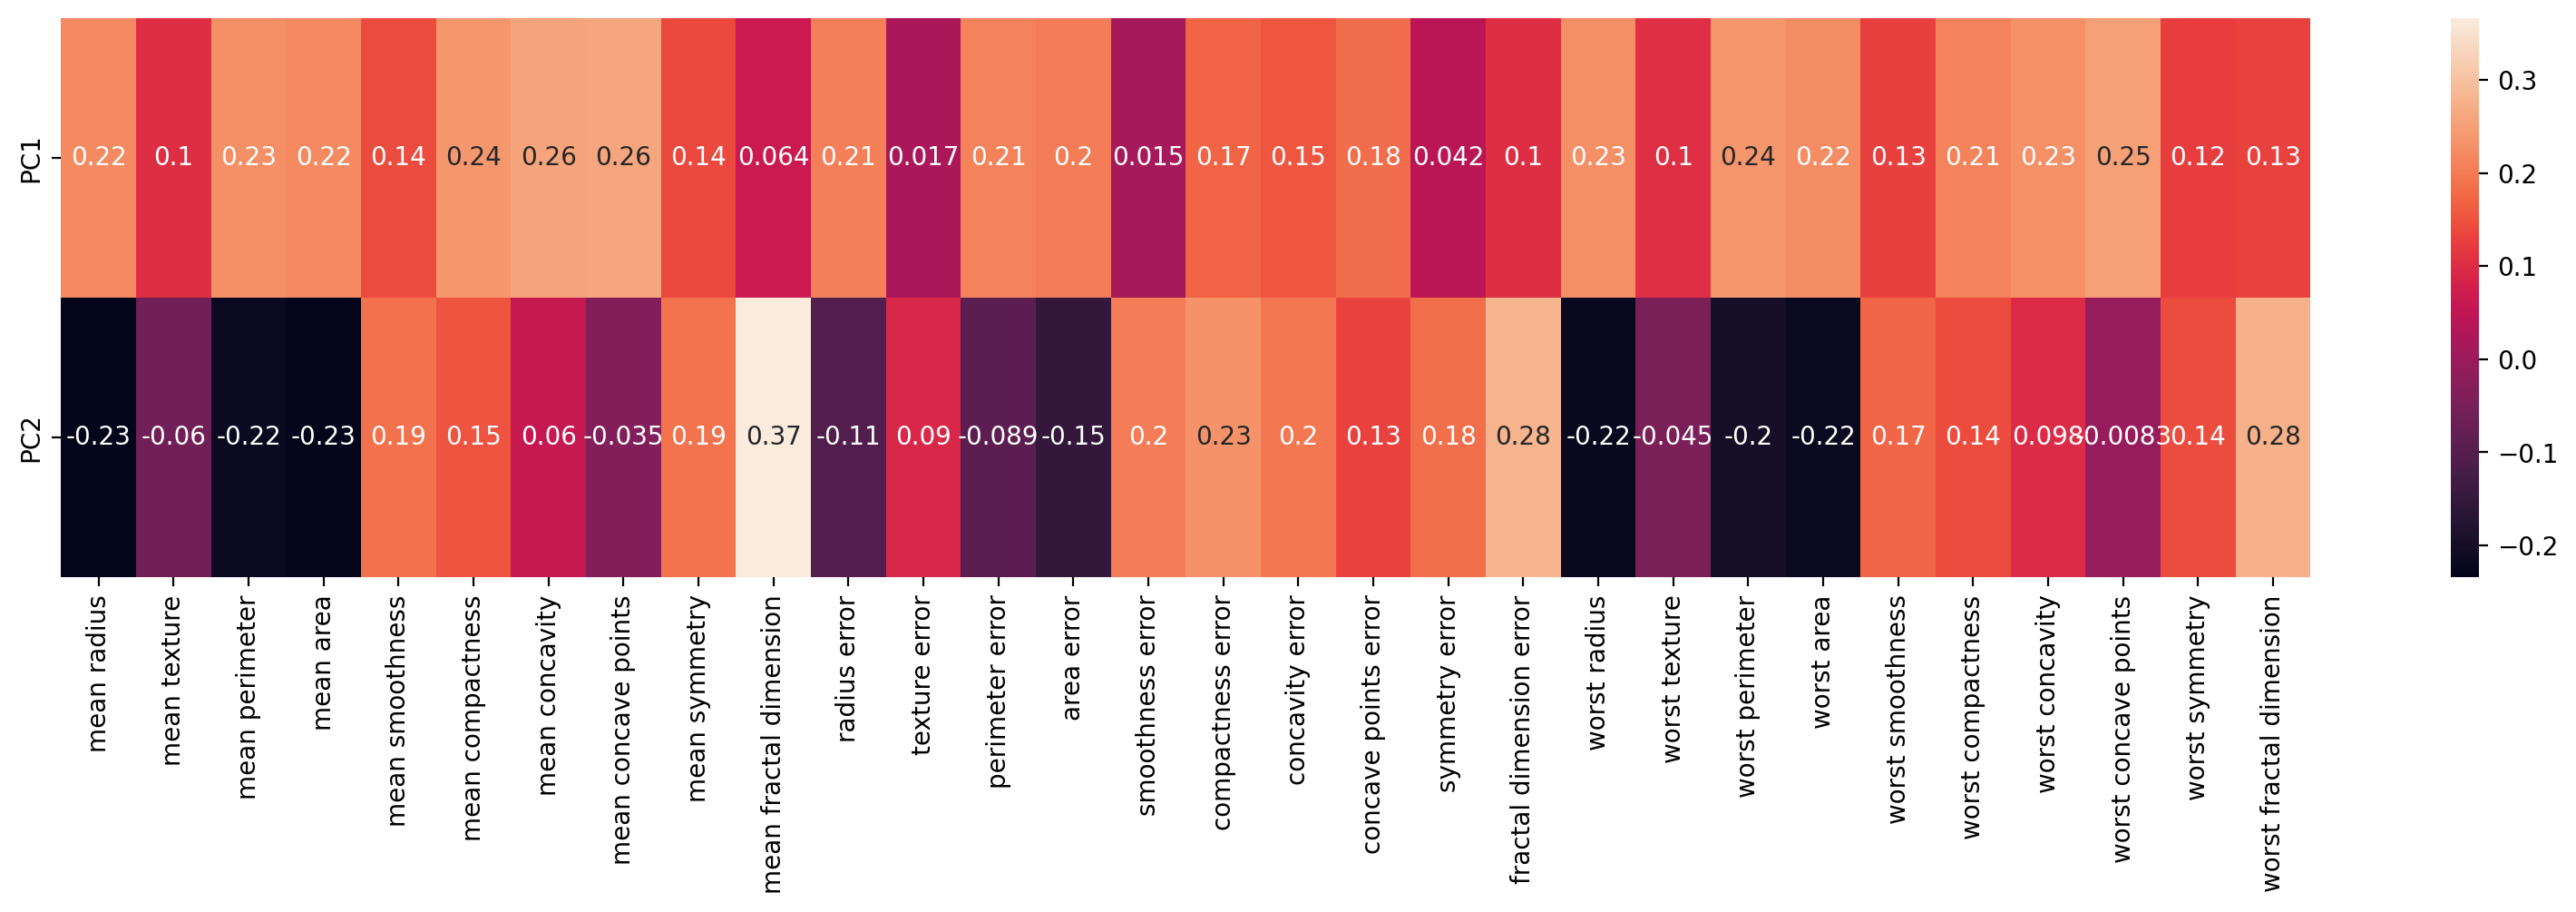

In [32]:
plt.figure(figsize=(20,4) , dpi=200)
sns.heatmap(df_comp , annot=True)

In [34]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155945

In [35]:
pca_30 = PCA(n_components=30)
pca_30.fit(scaled_X)


PCA(n_components=30)

In [36]:
np.sum(pca_30.explained_variance_ratio_)

1.0

In [37]:
explaineed_variance = []

for i in range (1,30):
    pca_30 = PCA(n_components=i)
    pca_30.fit(scaled_X)

    explaineed_variance.append(np.sum(pca_30.explained_variance_ratio_))

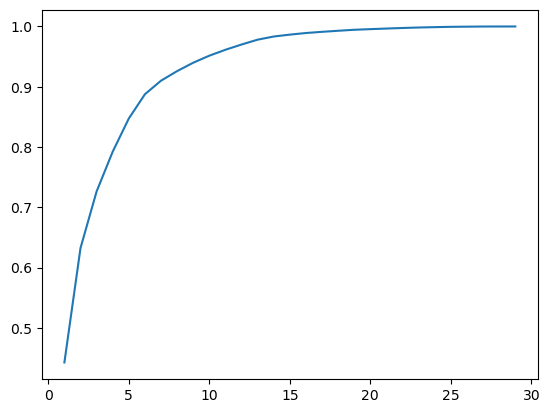

In [38]:
plt.plot(range(1,30) , explaineed_variance)